# Flower Surveys

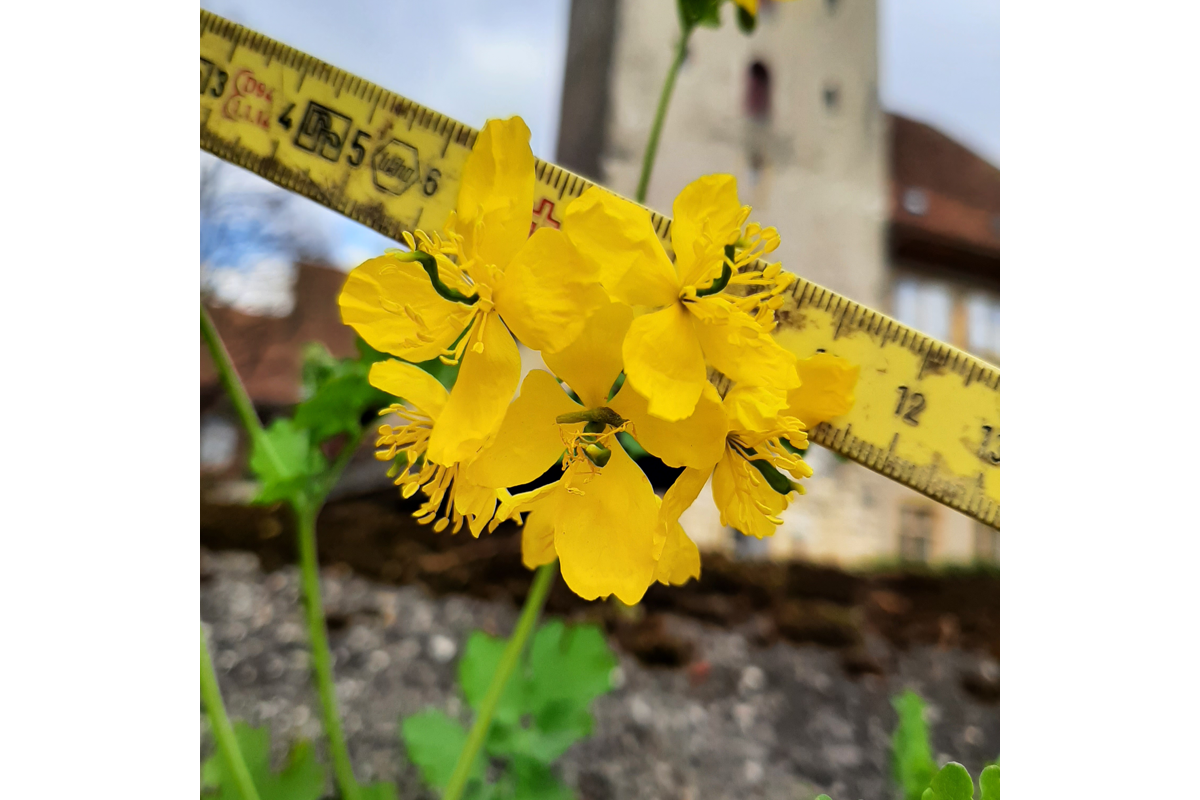

In [1]:
# Final notebook for 2020-2021 plant surveys

# math and data packages
import pandas as pd
import numpy as np
import math

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import colors
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display
import botany_utilities as bot

# import survey data and initialize datetime
spd=pd.read_csv("resources/survey_data_lists_02_22.csv")
spd["date"] = pd.to_datetime(spd['date'], errors='coerce', format='%Y-%m-%d')
spd["month"] = spd["date"].dt.month

charac = ["inv", "ns", "rch", "ni", "ongen"]

spd_allstats = pd.concat([bot.mutually_exclusive_plant_charac(spd, old_col=x) for x in charac])

spd1 = spd_allstats.loc[spd_allstats.year == 1].copy()
spd2 = spd_allstats.loc[(spd_allstats["year"] == 2)].copy()
animage = bot.display_image_ipython("resources/images/20210403_123904.jpg", thumb=(1200,800), rotates=-90)
display(animage)

*__Figure 1 :__ Chelidonum majus, a common roadside plant in Biel/Bienne, growing in the wall surrounding Nidau castle*

## Objectives &#10049;
The objective of this report was to construct an initial dataset on the flowering plant populations growing in different green spaces around the city of Biel/Bienne. The first survey period between June and September 2020 focused on the Suze river and its Madretschkanal variant in Biel/Bienne. The second set of surveys were conducted between February 2021 and September 2021 and included a wider geographical scope around the municipality of Biel/Bienne, namely parks, railway and road berms, empty lots and small urban forests. 

## Background &#127804;

### Crisis of Biodiversity in vascular plants 
There is a worldwide biodiversity crisis that will only accelerate under the increasing impacts of climate change and anthropogenic pressures. Switzerland is not an exception to these unfortunate developments, as experts have noted with increasing alarm for some time. In 2010, the IUCN Redlist report on the conservation status of Swiss vascular plants concluded that:

> Overall, every single Redlist documents a manifest and sustained loss of species diversity at national level. Most threatened species appear to be bound for further losses – with no likelihood of this trend being reversed in the short term. In other words, the requirement enshrined in the Swiss Constitution that animal and plant species be prevented from going extinct has not been fulfilled.

Ten years later, after identifying widespread local extinctions that irreversibly harm genetic diversity of plant populations and precede general extinctions, Swiss researchers concluded {cite}`Hicks_2020`: 

> Our study presents clear evidence that current efforts to conserve threatened plant species are insufficient to achieve national and international targets (Convention on Biological Diversity (CBD), 2011; Swiss Biodiversity Strategy 2012) for maintaining biodiversity. The current paradigm of protecting and restoring threatened habitats is failing to avert extinctions. Going forward, we need to develop a comprehensive landscape approach, involving the creation of ecological infrastructure and translocation and assisted migration of threatened species into suitable habitats.

In Switzerland the vascular plants that are most threatened are aquatic or semi-aquatic {cite}`Bornand_2016`. Widespread modification of waterways, the spread of invasive species, agricultural run-off, development of shorelines and regulation of water levels has led to the decline of suitable habitats and subsequently some 70% of species are evaluated as threatened to some extent in the 2016 Redlist. 

Next, are species associated with traditional forms of agriculture and land management, namely species in low altitude prairies, ruderal areas, and cropland/vineyards, which have largely disappeared in the past 100 years, which range from 40% - 60% threatened (Ibid). The decline of these species follows directly from changing agricultural practices. The species of least concern are associated with alpine habitat, rockfalls, and other largely undisturbed habitat that have historically been relatively spared from encroachment (Ibid). All of this is unfolding against the backdrop of accelerating climate change that researchers expect will provoke a major shift in habitat distributions and be a medium-term stress factor for a significant number of Switzerland's vascular plants {cite}`Vittoz_2013`.

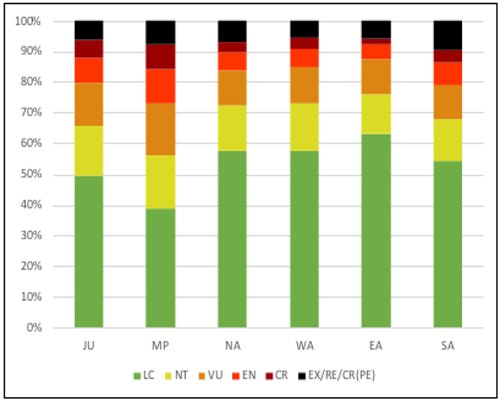

In [2]:
bot.display_image_ipython("resources/images/redlist-species_cropped.png", thumb=(500,400))

*__Figure 2 :__ This figure taken from Infoflora's 2019 Regional Redlist shows the assessed threat level of the different plants in each of Switzerland's regions. We see that the middle plateau / central plateau (MP) has the highest number of plants rated higher than "LC", or least concern, followed by the Jura (JU).*

### Middle plateau 
The heart of Switzerland's population and economic output, the Middle Plateau (MP) is also where localized extinctions are most prominent {cite}`Hicks_2020`. Some 60% of the vascular plant species evaluated for the IUCN's Redlist in the MP are classified as potentially or actually regionally threatened; next comes the Jura region with 50% threatened regionally {cite}`InfoFlora_2019`. Again, species associated with freshwater habitats are the group of most concern, with some 3/4 of species under potential threat. Around 60% of the alpine populations that survive throughout the plateau are evaluated as under potential threat, as are just over half of lowland grassland species, and nearly half of forest species (Ibid). Increased levels of output and consumption, as well as relatively intensive agricultural practices, are identified as the main drivers of risk for regional biodiversity. Not all of this is due directly to higher anthropogenic pressures: the central plateau hosts isolated, localized populations that are inherently more vulnerable to pressures on their populations (Ibid).

### Urban and suburban conservation 
A judicious use of public spaces, such as road verges, railroad berms and parks, that balances their potential as habitats with the needs and requirements of the city's inhabitants can mitigate some anthropogenic pressure. Research has shown that increasing the size of green patches and ensuring connectivity with larger green spaces within urban areas can boost biodiversity within cities {cite}`VEGA2020`. Allowing spaces to go unmowed, sowing native wild-flower beds, and creating micro-habitats throughout urban and suburban areas can benefit both herbaceous and predatory insects {cite}`Sattler_2011`. In fact, (sub)urban green spaces and road verges can provide plants, insects, and birds with suitable conditions to pursue their life cycles and even become a "last refuge" for certain species (ibid).  While private gardens provide refuge for native species, research also shows that private gardens are heavily biased towards non-native plants, potentially making public spaces even more important as a suitable refuge for remnant wild species {cite}`SMITH2006312`. As such, improvement and maintenance of areas in and around urban centers could yield outsize results in terms of biodiversity preservation at this critical juncture for the future of ecosystem services; the most recent data of nationwide biodiversity provided by the Biodiversity Monitoring System shows a decline in urban vascular plant species diversity {cite}`FOEN_2020`.

There are a number of different strategies that municipalities can use to boost wildflower diversity. For example, two comparable strategies are the sowing of annual wildflowers and the planting and maintenance of (native) perennials. A comparative study of these management mechanisms outcomes showed the strategy of annual patches was strongly dominated by native perennial patches, with remnant populations providing resources during the crucial early months of Spring that were not being provided by the plants seeded by the greenspace managers {cite}`HICKS2016`. Annual wildflower strips ploughed during the winter period can act as an ecological trap for overwintering arthropods who are killed during the process: one study found nearly 70% of beetles failed to emerge from hibernation in wildflower strips managed in this way{cite}`GANSER2019123`. Perennial wildflower strips on the other hand were found to provide significant habitat for arthropods (Ibid). In short, management decisions can have wide ranging effects: one recent finding from Zürich, which confirms previous research, is that sowing of commercial wildflower seed in two annual species significantly impacted the gene pool of the species in the city {cite}`VEGA2020`.

## Survey locations &#127966; 
In the first year, sites were chosen almost exclusively on the urban Suze river and its Madretschkanal variant in Biel/Bienne. Along this stretch of the river there are many varied habitats, ranging from deep shade to full pavement to flower strips maintained for ecological and aesthetic purposes. Sites were chosen in a semi random way out of locations that are managed the municipality to a greater or less degree and reasonably accessible. In 2021 the surveys included a wider geographic scope, but still focused on the Madretschkanal and the urban Suze river.  Their is a bias towards locations around the Madretsch quarter and towards locations with visible flowering plants - sites with no flowers were not recorded. The additional zones surveyed ranged from railroad berms to boxes planted by the city to renaturalization sites. As such, the sites varied greatly in size, shape and species composition.

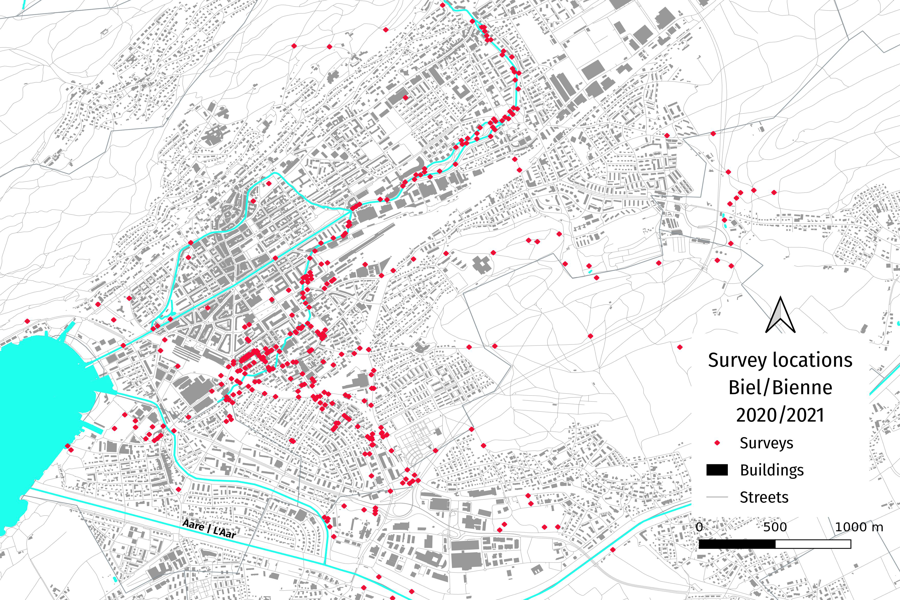

In [3]:
bot.display_image_ipython("resources/images/qgismap_one.jpeg", thumb=(900,600))

*__Figure 3 :__ Map of survey locations around Biel/Bienne in 2020 - 2021. Note that some surveys occured outside the scope of this map. Note also the heavy focus on the Suze river and the Madretschkanal branch, as well as the Madretsch quarter of Biel/Bienne.*

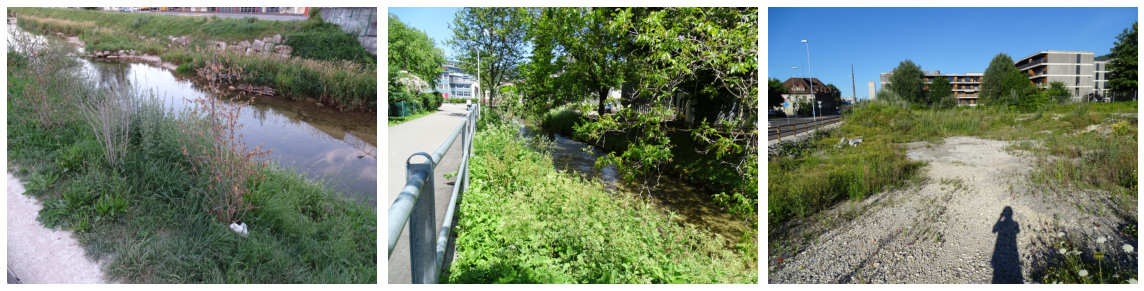

In [4]:
# generate images of survey sites

def open_these_images(anarray):
    return [PILImage.open(x).convert("RGBA") for x in anarray]

def display_grid_of_images(anarray, cols=3, rows=1, labels=[], figsize=(10,8) ):
    fig, ax = plt.subplots(rows,cols,figsize = fig_size)

    for anax in ax:
        anax.axis("off")
    
    for i,im in enumerate(anarray):
        ax[i].imshow(im)
        ax[i].set_xlabel(labels[i], fontsize=16, loc="left", labelpad=15)
    
    plt.tight_layout()
    plt.show()

images_to_display = [
    'resources/images/DSC04657.JPG',
    'resources/images/suze-2.JPG',
    'resources/images/DSC02009.JPG'
    
]

labels = [
    "Ile de la Suze",
    "Holunderweg",
    "Cygnes Lot",
    
]

rows = 1
cols = 3
fig_size=(16,10)

# open the images
anarray=open_these_images(images_to_display)

# display the images
display_grid_of_images(anarray, cols=cols, rows=rows, labels=labels, figsize=fig_size )

*__Figure 4 :__ Images of three survey sites along the urban Suze river and the Madretschkanal. There was a great diversity in survey site characteristics amenable to many varieties of plants.*

The size of the sites was not recorded, but a detailed description is available and it is also possible to recover the boundary of the sites based on the field notes and the geometry of the object as surveys were usually bounded by sidewalks, roads, or other barriers. Larger features, such as those in the photos above, were typically broken into several smaller sites and surveyed individually. Othertimes, survey sites are small and isolated, an "island" in a "sea" of concrete, as in the features surveyed in Zukunftstrasse shown below on the right.

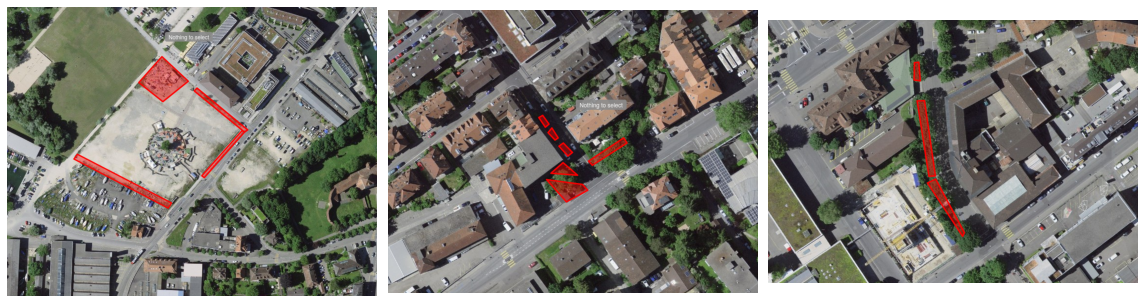

In [5]:
images_to_display = [
    'resources/images/Selection_034.png',
    'resources/images/Selection_035.png',
    'resources/images/Selection_037.png'
    
]

labels = [
    "Flösserweg lot",
    "Zukunftstrasse/Rue de l'avenir",
    "Alleestrasse / Rue de l'allée",
    
]

rows = 1
cols = 3
fig_size=(16,8)

# open the images
anarray=open_these_images(images_to_display)

# display the images
display_grid_of_images(anarray, cols=cols, rows=rows, labels=labels, figsize=fig_size )

*__Figure 5 :__ Three examples of the decomposition of city features into survey sites. __Left :__ Shows an example of how one lot was surveyed. __Middle :__ Two different feature types were surveyed at this location near Zukunftstrasse: Three raised garden beds put in by the city to slow street traffic, and two isolated river bank sites. __Right :__ The curvature in the Madretschkanal and the concrete driveway crossing the canal separate adjascent survey sites.*

## Method  &#127811; 

A site was inspected for the vascular plants in flower, and all the different species identified were recorded. Throughout the survey period, the majority of plants identified were in flower in order to increase the reliability of observations. The exceptions are a small number of tree identifications, shrub identifications (such as the genus Nitida, Taraxacum), and *Hedera helix*, which is imminently recognizable and is common throughout survey locations. Most of these non-flower identifications are to the genus level only. Note that Poaceae and Juncacea (grasses and sedges) were left off the survey entirely due to the difficulty in identification. For all species, the subspecies were not recorded. The below algorithm was repeated for all flowering plants on a survey site:
* If a plant was known it was checked for the recognizable characteristics and immediately recorded
* If a flower was not known it was looked up in a plant identification application (Flora Incognita and/or PlantNet) and subsequently checked against the latest Flora Helvetica guidebook. If an identification was confident, it was recorded.
* If an identification was not clear even after these consultations, it was recorded to the genus level if possible, or left off of the observations.

Nearly all plants in flower could be identified following this algorithm, which became increasingly efficient as time went on. In June 2020, the number of plants that could be reliably identified by the surveyor was small, whereas by August 2020, the surveyor could reliably identify the common species that dominate the landscape. This meant that the 2020 - 2021 observations are not directly comparable as the surveyor was able to record a significantly higher number of species during the second year. In addition, as the number of species that were recognizable without the need to consult an algorithm or a guidebook increased, the surveys became increasingly quick. Some direct results of this data collection protocol are the following:
* The year on year results should be compared with caution as the surveyor was able to identify more plants in the second year
* If a plant was visible but not flowering, it was very unlikely to be recorded on the survey
* There is no information about the relative densities of the plants within surveys

## Results &#128200; 

The following figures provide summary data from year one and year two. The general takeaway is that throughout the year there is a high level of diversity on the species, genus and family level, which reached 66 families, 275 different genus and 552 different species identified in the second year. Note that only the families of native species were included, meaning that a number of neophyte (non-native) families are not represented in the below tables. 

While some of these surveys were conducted outside of Biel, their part of the surveys is about 7%, meaning the overall patterns remain the same with their exclusion. When compared to the observations reported to Infoflora there are 1207 different vascular plant species that have been identified in the 100 square kilometers centered on Biel/Bienne. Of these species, some 450 were identified on the plant surveys and about 100 species were identified in the surveys but not included in Infoflora's list of observations. While a great part of this mismatch is due to the surveyor not identifying most trees, grasses and ferns, it also indicates a significant floral diversity in the region that was not identified in the surveys. It also indicates that Infoflora may underestimate the diversity of plant species in urban spaces, even if this diversity may be less valuable ecologically and come from commercial seeds and non-native plants.

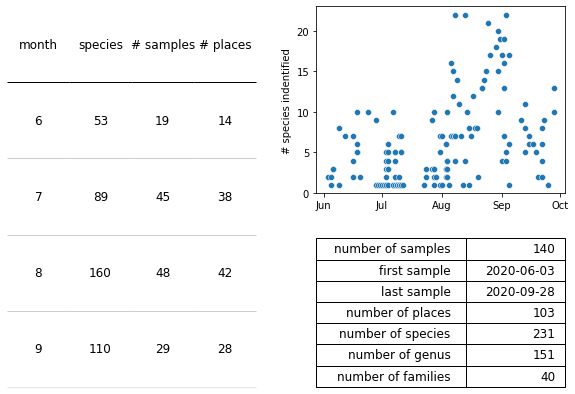

In [6]:
# axone monthly summary values
t_one = spd1.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})
species1 = spd1.species.nunique()
speciesint = spd1["species"].str.contains("-")
species2 = speciesint.nunique()
species_corrected = species1-species2

data = t_one.values
colLabels = [*t_one.columns[:-2], "# samples", "# places"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
bbox = [0, 0,1,1]

# axtwo species identified per sample
d1 = spd1.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spd1.loc_date.nunique(),
    "first sample": spd1["date"].min().date(),
    "last sample":spd1["date"].max().date(),
    "number of places":spd1.locname.nunique(),
    "number of species":species_corrected,
    "number of genus":spd1.genus.nunique(),
    "number of families":spd1.fam.nunique(),
}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = bot.a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d1, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = bot.a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

*__Figure 6__: Summary statistics for the first year of surveys. __Left :__ The number of unique species, unique samples, and unique sites surveyed per month in year 1. __Top right__: The number of species identified per survey over year 1. __Bottom right__: Summary statistics of year 1.*

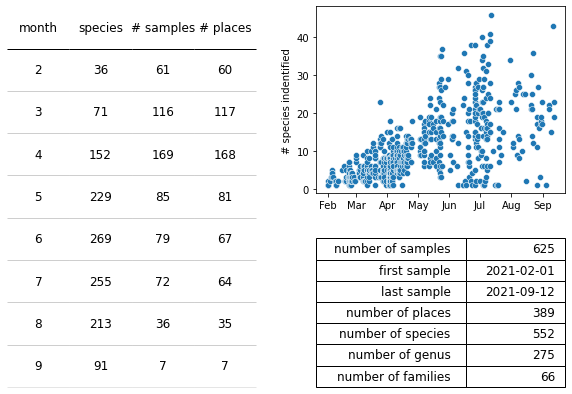

In [7]:
# axone monthly summary values
t_one = spd2.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})
species1 = spd2.species.nunique()
speciesint = spd2["species"].str.contains("-")
species2 = speciesint.nunique()
species_corrected = species1-species2

data = t_one.values
colLabels = [*t_one.columns[:-2], "# samples", "# places"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
bbox = [0, 0,1,1]

# axtwo species identified per sample
d1 = spd2.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spd2.loc_date.nunique(),
    "first sample": spd2["date"].min().date(),
    "last sample":spd2["date"].max().date(),
    "number of places":spd2.locname.nunique(),
    "number of species":species_corrected,
    "number of genus":spd2.genus.nunique(),
    "number of families":spd2.fam.nunique(),
}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = bot.a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d1, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = bot.a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

*__Figure 7 :__  Summary statistics for the second year of surveys. Notice the survey period began in February rather than June and the significantly increase across all metrics. __Left :__ The number of unique species, unique samples, and unique sites surveyed per month in year 1. __Top right__: The number of species identified per survey per month in year 1. __Bottom right__: Summary statistics of year 1.*

### Categorizing the species 

The plants in this anaysis can be divided into native and non-native plants; all species that arrived after 1500 (the discovery of America) are considered neophytes. All other species are considered native and are evaluated under the IUCN Redlist. Nearly all native species have their conservation status characterized by an IUCN Redlist attribute and neophytes can be characterized by their potential (or lack thereof) to become invasive (there are culturally valuable neophytes but these account for 5 observations, or .08% of all species identified which fall under neither category). Some 70% of species identified were native and classified as "Least Concern", a proportion that remained stable throughout the survey period. This is in line with what might be expected: the survey would likely identify populations of hardy, common plants resistant to anthropogenic pressures with a significant minority of neophytes that are planted purposefully, spill over from gardens, or have become naturalized in the man-made landscape. Note that for all taxonomy and classification this analysis follows the designations of the national authority of Switzerland, Infoflora.

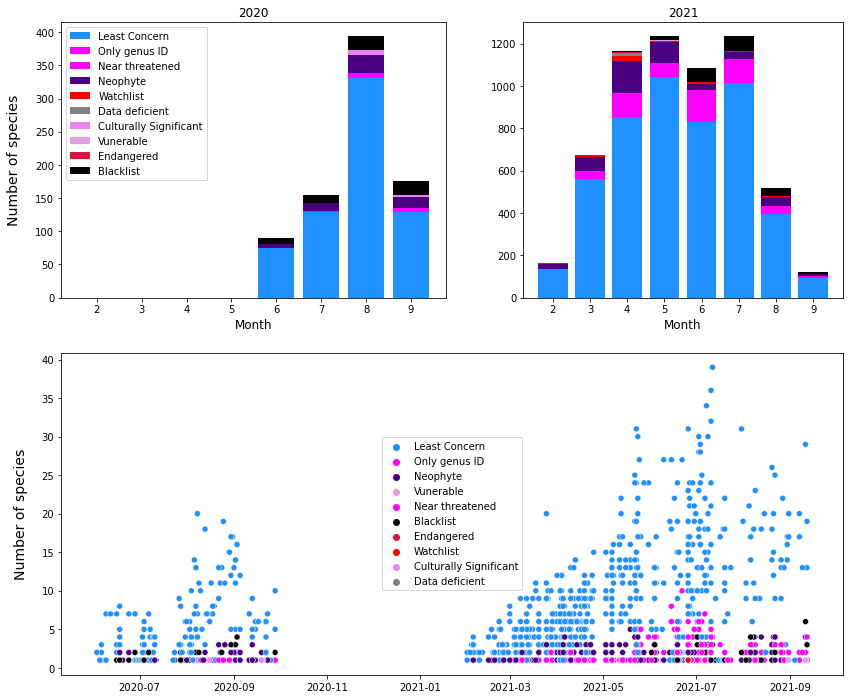

In [8]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="allstats", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column] == value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = pd.concat([data, pd.DataFrame(add_these)])
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
spdas1 = spd_allstats.loc[spd_allstats["year"] == 1].copy()
spdas2 = spd_allstats.loc[spd_allstats["year"] == 2].copy()
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["allstats"]
not_these = ["X","-"]

period = "month"
column = "allstats"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
    "WL":"red",
    "BL":"black",
    "ongen":"fuchsia",
    "ns":"violet",
    "ni":"indigo"
}
    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_as_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_as_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_as_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_as_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)
    

# rmp status per survey
all_stat = pd.DataFrame(spd_allstats[~spd_allstats[column].isin(not_these)].groupby(["loc_date","date"]).allstats.value_counts()).rename(columns={column:"data"}).reset_index()

tick_spacing = 1

full_name = {
    "LC":"Least Concern",
    "EN":"Endangered",
    "NT":"Near threatened",
    "VU": "Vunerable",
    "NE":"Near endangered",
    "DD":"Data deficient",
    "WL":"Watchlist",
    "BL":"Blacklist",
    "ongen":"Only genus ID",
    "ns":"Culturally Significant",
    "ni":"Neophyte"
}

fig = plt.figure(figsize=(14,12))

gs = GridSpec(14,12)

axone = fig.add_subplot(gs[0:6, 0:6])
axtwo = fig.add_subplot(gs[0:6, 7:])
axthree = fig.add_subplot(gs[7:, :])

bot.a_stacked_bar_chart(axone, red_list_yone_bars, xaxis=set_dates, palette=a_palette)
bot.a_stacked_bar_chart(axtwo, red_list_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"

axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")
h,l = axone.get_legend_handles_labels()
nl = [full_name[x] for x in l]
axone.legend(h,nl)
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=all_stat, x="date", y="data", hue="allstats", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")

h,l = axthree.get_legend_handles_labels()
nl = [full_name[x] for x in l]
axthree.legend(h,nl, loc='center')

plt.show()   

*__Figure 8 :__ Categorization of the identified species, plotted chronologically. __Top left :__ The number of plants identified per month for 2020 surveys, __Top right :__ The number of plants identified per month for the 2021 surveys. __Bottom :__ The number of unique species identified per survey plotted monthly.*

### Non-invasive neophytes &#127799;  

The vast majority of neophytes have little chance of establishing spontaneous populations in the wild or even in urban spaces, yet a number have succesfully established populations in Switzerland over the past 500 years. One common non-invasive neophyte (although it can become invasive locally) is the annual *Conyza canadensis* (*Erigeron canadensis*) from North America that thrives in disturbed areas around the city. It was identified in 12 locations in August and September 2021, however these numbers underplay the relative amount of the plant in a given location as it spreads quickly and can dominate a given area during the late summer. Despite this dominance, this pioneer plant generally cedes its place to normal succession processes and thus is not considered invasive. Another two common examples of neophytes that have succesfully naturalized without becoming invasive are *Onobrychis viciifolia*, common in fields and along road verges in late spring and early summer, and *Eupatorium cannabinum*, common along road verges and river banks.

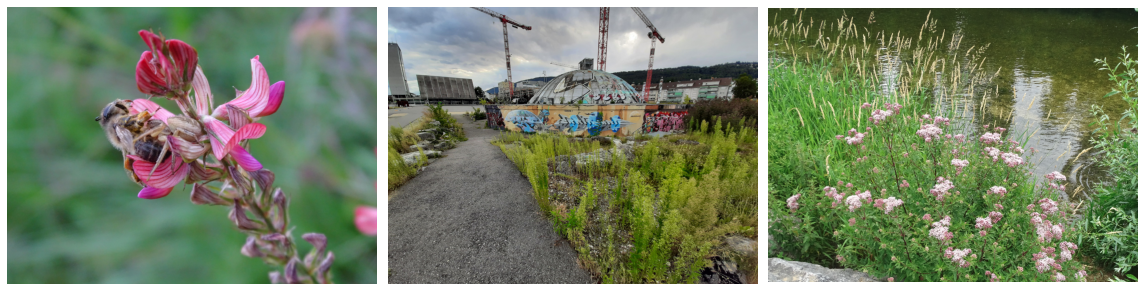

In [9]:
images_to_display = [
    'resources/images/intro-1_scaled.jpg',
    'resources/images/20210822_192453_scaled.jpg',
    'resources/images/Selection_028.png'
    
]

labels = [
    "Onobrychis viciifolia",
    "Conyza canadensis",
    "Eupatorium cannabinum",
    
]

rows = 1
cols = 3
fig_size=(16,8)

# open the images
anarray=open_these_images(images_to_display)

# display the images
display_grid_of_images(anarray, cols=cols, rows=rows, labels=labels, figsize=fig_size )

*__Figure 9 :__ Three common non invasive neophytes that grow in different environments around Biel/Bienne. __Left to right :__ O. viciifolia is commonly found in fields, road and railroad berms in late spring and is often purposefully planted; C. canadensis is an annual common in lots and highly disturbed areas with fully spontaneous populations; E. cannabinum thrives along river banks and in more humid areas and can bloom throught the late spring and summer.*

### Invasive species  &#127802; 

A small number of neophytes are considered invasive, meaning they reproduce in the wild and pose a threat to humans and/or local ecosystems. Usually for invasive plants this is through displacement of plant populations - the invasive species takes over a given area and native species have difficulty pushing it out. Info Flora maintains a list of the current watch list and black list species, a number of which were identified over the course of the survey. Some of them were purposefully planted, such as the rows of *Mahonia aquifolium* throughout Biel/Bienne's Madretsch quarter. Others have moved in of their own accord such as *Solidago canadensis* and *Erigeron Annuus*.

Invasive species in this study are defined as those species classified as either being on the *Watch List* (WL) or the *Black List* (BL) from the 2014 list compiled by Infoflora and the FOEN. Many more instances of BL species were recorded than WL species throughout the course of the survey period, as can be seen in the below chart and tables. In both cases, there are a few key invasive species that drive the dynamic, namely *Erigeron annuus* (BL), *Solidago canadensis* (BL), *Senecio inaequidens* (BL), *Buddleja davidii* (BL) and *Mahonia Aquifolium* (WL), with *E. annuus* twice as common as its nearest "competitor", *S. canadensis.*

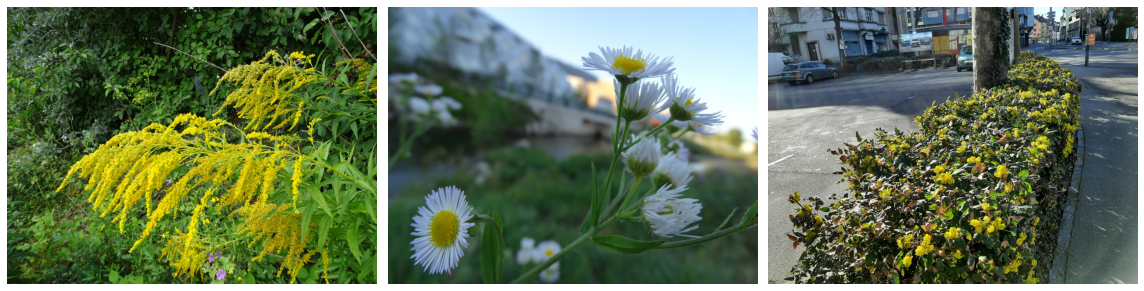

In [10]:
images_to_display = [
    'resources/images/DSC02758_scaled.JPG',
    'resources/images/iledelasuze2_scaled.JPG',
    'resources/images/20210404_093051_scaled.jpg'
    
]

labels = [
    "Madretschkanal - Solidago sp.",
    "Schüssinsel - Erigeron annuus",
    "Kreuzplatz - Mahonia Aquifolium",
    
]

rows = 1
cols = 3
fig_size=(16,8)

# open the images
anarray=open_these_images(images_to_display)

# display the images
display_grid_of_images(anarray, cols=cols, rows=rows, labels=labels, figsize=fig_size )

*__Figure 10 :__ Three common species of invasive plants found throughout the city. __From left to right:__ S. canadensis, common throughout the city in both disturbed areas and gardens (homeowners seem to like the yellow flowers); E. annuus which can be found flowering throughout the city from June to September;  M. aquifolium, unlike most cases of the first two species, was planted purposefully throughout the city and has spread spontaneously through consumption of its berries by birds.*

One interesting absence across all survey locations was *Reynoutra japonica*, a member of the Blacklist (BL). An aggressive invader of riverbanks and increasingly common throughout waterways in Switzerland, only one stand was identified near the Mettmoos park in Längholz (close to an official survey area). Additionally, the species *Prunus Laurocerasus* was undercounted as it is primaly a plant of hedgerows, which were generally not surveyed. As such, a significantly higher amount of prunus laurocerasus is encountered in Biel.

Note as well that "invasive" describes a behavior, namely the potential to dominate certain areas and preventing other plants from growing. In highly disturbed areas or in ecological systems in disorder it is possible for native species to act invasively and for typically non-invasive neophytes to become locally invasive. Thus, the species on the invasive species list in some sense undercount the invasive status as it does not take locally invasive species into account.

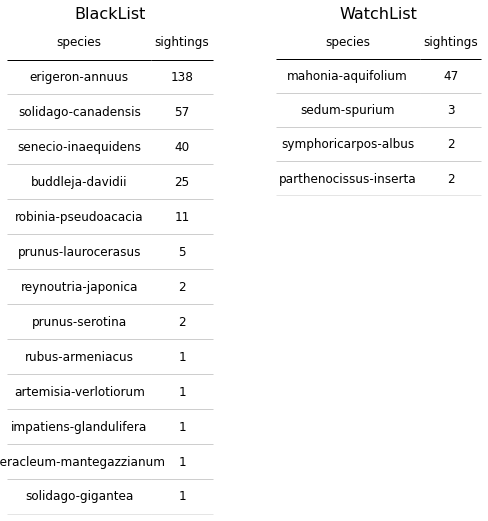

In [11]:
# code for tables for black list and watch list species

a = spd.loc[spd.inv == "BL", "species"].value_counts()
b = spd.loc[spd.inv == "WL", "species"].value_counts()

# tables
black_list = [[a.index[x],a.values[x]] for x in np.arange(len(a))]
white_list = [[b.index[x], b.values[x]] for x in np.arange(len(b))]

fig = plt.figure(figsize=(8.5,9))

gs = GridSpec(14,9)

axone=fig.add_subplot(gs[0:, :4])
axtwo=fig.add_subplot(gs[0:5,5:])
atable = bot.a_simple_formatted_table(axone, black_list, colLabels=["species", "sightings"], colWidths=[.7,.3], bbox=[0,0,1,1])
axone.axis("off")
axone.set_title("BlackList", fontsize=16)

atable2 = bot.a_simple_formatted_table(axtwo, white_list, colLabels=["species", "sightings"], colWidths=[.7,.3], bbox=[0,0,1,1])
axtwo.axis("off")
axtwo.set_title("WatchList", fontsize=16)
plt.show()

*__Figure 11:__ The above tables of the Black List and Watch List species demonstrate that the overall abundance of invasive species in the survey locations was driven by a few key species. Part of this is an artefact of sampling certain areas and not sampling the hedgerows in which Prunus laurocerasus is highly present.*

In most cases either no invasives or only one invasive species was found in each survey. This is constant across months and across years. Since only a handful of invasives are driving these numbres, it is clear to that the higher numbers of invasive species identified in June, July, August and September corresponds to the flowering season of *E. Annuus*, *S. canadensis* and *S. inaequidens*

In [12]:
these_lists = ["allstats"]

period = "month"
column = "allstats"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
    "WL":"red",
    "BL":"black",
    "ongen":"fuchsia",
    "ns":"violet",
    "ni":"indigo"
}    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_as_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_as_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_as_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_as_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)

# rmp status per survey
all_stat = pd.DataFrame(spd_allstats[~spd_allstats[column].isin(not_these)].groupby(["loc_date","date"]).allstats.value_counts()).rename(columns={column:"data"}).reset_index()

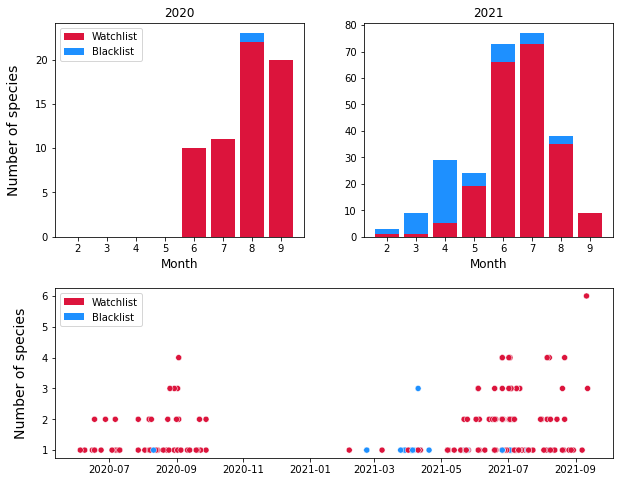

In [13]:
these_lists = ["inv"]

period = "month"
column = "inv"

biogeo = "mp"

a_palette = {
    "WL":"dodgerblue",
    "BL":"crimson",
}    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_rch_yone = periodic_value_counts(newDf, column, exclude=not_these)

inv_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_rch_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=inv_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_rch_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

inv_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_rch_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=inv_ytwo_bars)

# rmp status per survey
inv_stat = pd.DataFrame(spd[~spd[column].isin(not_these)].groupby(["loc_date","date"]).inv.value_counts()).rename(columns={column:"data"}).reset_index()

tick_spacing = 1

fig = plt.figure(figsize=(10,8))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[0:5, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, :])

bot.a_stacked_bar_chart(axone, inv_yone_bars, xaxis=set_dates, palette=a_palette)
bot.a_stacked_bar_chart(axtwo, inv_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"

axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")

h,l = axone.get_legend_handles_labels()

axone.legend(h, ["Watchlist", "Blacklist"])

axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=inv_stat, x="date", y="data", hue="inv", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")
axthree.legend(h, ["Watchlist", "Blacklist"])

plt.show()   

__Figure 11 :__ The number of invasives identified over the course of the survey. __Top :__ The number of invasives identified per month in 2020 and 2021: __Bottom :__ The number of invasive species identified per survey over the course of two years.

### Redlist and priority list species on the middle plateau  &#127800; 

The IUCN Redlist is an internationally comparable ranking of the conservation status of individual species and biotopes. Infoflora worked with the IUCN to create a national redlist for Switzerland, last updated in 2016. This analysis was complemented in 2019 with the publishing of a regional Redlist report. This provided a IUCN redlist rating for each native species in each of Switzerland's main biogeographical regions. In the previous analysis the redlist categories were based on the national rating as about 600 observations (out of 7600) occured outside of the Central Plateau region. This section uses only observations made within the middle plateau region and categorizes them according to this regional redlist analysis. This is still the vast majority of survey locations and species identified and as will be seen does not change the overall decomposition. As noted in the introduction, the regional redlist for the middle plateau places many species on a higher risk rating than the national redlist. While species in each category were identified, the vast majority of native species were of least concern. Compared to using the national redlist ranking, the overall results do not change, with only a few species moving from Least Concern to Near Threatened.

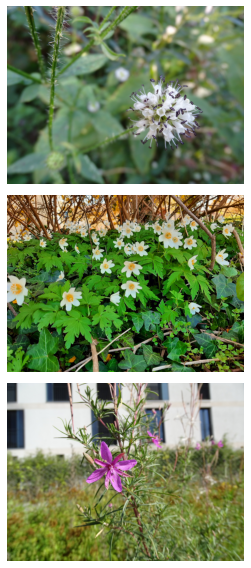

In [14]:
# Images for invasives

images_to_display = [
    'resources/images/dipsacus-pilosela_scaled.JPG',
    'resources/images/20210404_154240_scaled.jpg',
    'resources/images/epilobium-dodonaei_scaled.JPG'    
]

labels = [
    "Schüessinsel - Dispacus pilosus",
    "Portplatz - Anemone nemorosa",
    "Suze, Bürenstrasse - Epilobium dodonaei"    
]

cols= 1
rows= 3
fig_size = (16,8)



anarray = open_these_images(images_to_display)

display_grid_of_images(anarray, cols=cols, rows=rows, labels=labels, figsize=fig_size )

*__Figure 12 :__ Some examples of native species found throughout Biel/Bienne. __From top to bottom:__ Dipsacus Pilosus, a regionally near threatened species growing along the Suze; Anemone nemorosa a common woodland species of least concern that grows under some city hedges; Epilobium dodonaei another regionally near threatened species growing along a different section of the Suze river*

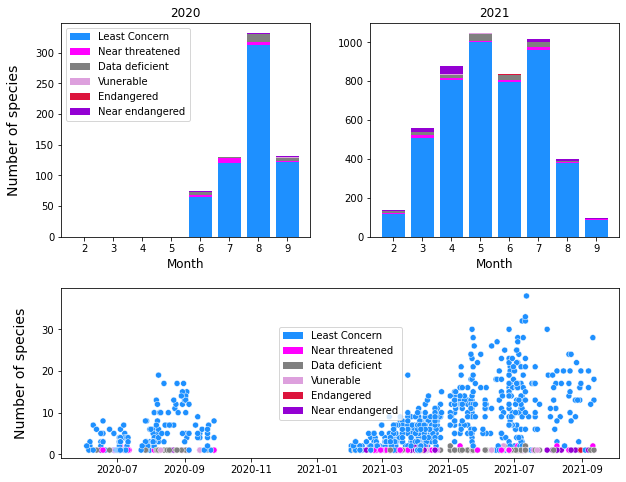

In [15]:
these_lists = ["rch","ni", "inv", "ongen"]


period = "month"
column = "rmp"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
}    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_rch_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_rch_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_rch_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_rch_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)
    
# rmp status per survey
rmp_stat = pd.DataFrame(spd[~spd[column].isin(not_these)].groupby(["loc_date","date"]).rmp.value_counts()).rename(columns={column:"data"}).reset_index()

tick_spacing = 1

fig = plt.figure(figsize=(10,8))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[0:5, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, :])

bot.a_stacked_bar_chart(axone, red_list_yone_bars, xaxis=set_dates, palette=a_palette)
bot.a_stacked_bar_chart(axtwo, red_list_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"

axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")

h,l = axone.get_legend_handles_labels()

ls = [full_name[x] for x in l]
axone.legend(h,ls)
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=rmp_stat, x="date", y="data", hue="rmp", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")
axthree.legend(h,ls, loc="center")

plt.show()   

*__Figure 13 :__ The number of native species in the central plateau region identified over the course of the surveys classified by Redlist status. __Top :__ The number of species in each Redlist category identified per month per year. __Bottom :__  The number of native species in each category identified per survey over the whole time period.*

It must be taken into consideration that the genetic origin of many of these populations is unknown, especially for species that are widely commercially available. To use the species highlighted in Figure 12, both *A. nemorosa* and *E. dodonaie* are common garden plants and stand a good chance of being sourced from commercial seeds planted purposefully, while *D. Pilosus* is likely a remnant species since it is not easily available from a commercial source. This can only be resolved through genetic testing.

## Discussion and conclusion &#128144; 

These surveys add to the body of evidence that shows urban spaces can provide signficant plant diversity. Some general conclusions about the herbaceous flowering plants of Biel/Bienne can be drawn from the above data is the following:
* While invasive speces are widespread, they are characterized by a few key species
* Neophytes form a critical part of the vegetation of the city
* Only a few threatened or near threatened species are able to survive in the Biel/Bienne urban matrix.
* Public spaces contain significantly more native vegetation (around 75%) than private gardens (30%)

Plant surveys are best done year on year as weather and other factors can significantly affect the population distributions of vascular plant species. The first survey year, 2020, coincided with the warmest year on record in Switzerland, tied with 2018, with a scarcity of rainfall. Meanwhile, 2021 saw the wettest and coldest spring and summer weather for many local records. It is thus to be expected that these extreme variations would result in different plant species being identified across Biel/Bienne as a whole and even in certain survey locations. One anecdote of this is a regionally Near Threatened species, *Dipsacus pilosus*, which was identified near the Ile de la Suze on the banks of the Suze river in 2020, however in 2021 the site was submerged for much of the survey period due to the extra rainfall and there was no sign of its presence. While this sort of data can begin to be teased out by comparing the roughly 50 sites that overlap between 2020 and 21, the overall year on year analysis should wait until the 2022 data can be gathered.

This report does not delve into comparisons of features and does not make use of the fine scale of these surveys which would allow for a neighborhood by neighborhood analysis of plant resources in the city. Based on the data already keyed in to the dataset, there are useful analysis that can be done to compare different city features (such as railroad berms) and renaturalization sites (such as the Ile de la Suze) in and around Biel/Bienne. In addition, there rich sources of data available from municipal authorities that could allow explanatory causes to be determined and differentiated site treatments to be evaluated. Finally, digitizing the area component available in the survey notes will allow use of tools such as the Species Richness Model that ties plant diversity to greenspace size in urban areas.

To conclude, there are a number of interesting extensions to this analysis, some of which are possible with the available data and some of which will require integration with other datasets or collection of additional data. This report does not provide a causal analysis, test an existing thesis or build a predictive model, but of course these are the ultimate goals of the surveys. As such, notebooks related to these issues will be published in the coming months. Further, the plant surveys have begun anew and it is expected to match or exceed the observations made in 2021, which will provide a strong year on year data set of species make-up across seasons and across the city. There are a few modifications in the protocol which will facilite data collection and provide information on species density.